# Naive approach: Handcrafted features + Logistic Regression
Append features such as total words per document and frequent words with high variation between the two settings, after that apply logistic regression.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist


# Bit of pre-processing

In [26]:
train_essays = pd.read_csv('train_essays.csv')

human = train_essays[train_essays['label'] == 0]
llm = train_essays[train_essays['label'] == 1]

human_amount = human.count().label
llm_amount = llm.count().label


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return words


human_essays = human['text']
llm_essays = llm['text']

human_words = human_essays.apply(preprocess_text)
llm_words = llm_essays.apply(preprocess_text)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leetcomp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leetcomp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leetcomp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Handcrafting features

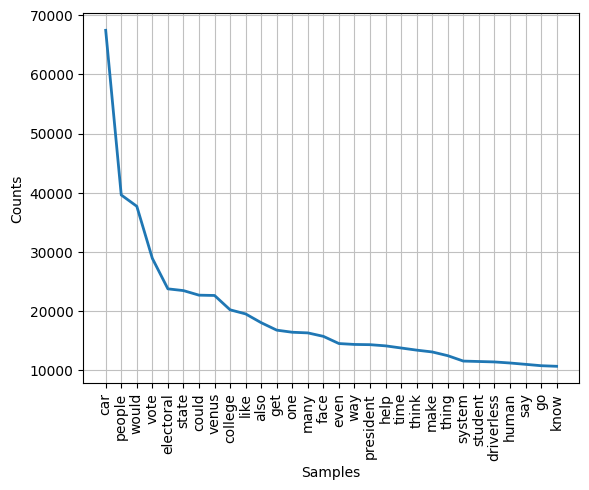

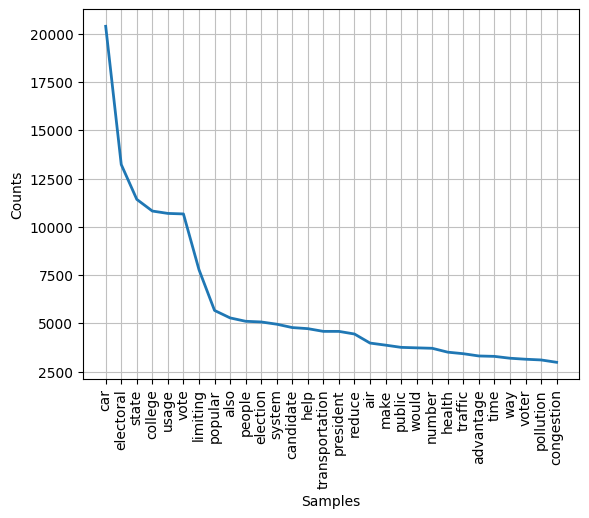

C:\Users\Leetcomp\AppData\Local\Temp\ipykernel_20412\3952855846.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human['total_words'] = human['text'].apply(lambda x: len(x.split()))
C:\Users\Leetcomp\AppData\Local\Temp\ipykernel_20412\3952855846.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llm['total_words'] = llm['text'].apply(lambda x: len(x.split()))
C:\Users\Leetcomp\AppData\Local\Temp\ipykernel_20412\3952855846.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

                                                text  label  total_words  \
0  Cars. Cars have been around since they became ...      0          584   
1  Transportation is a large necessity in most co...      0          462   
2  "America's love affair with it's vehicles seem...      0          744   
3  How often do you ride in a car? Do you drive a...      0          686   
4  Cars are a wonderful thing. They are perhaps o...      0          871   

   usage  electoral  limiting  college  state  car  vote  would  popular  \
0      1          0         3        0      1   19     0      3        0   
1      0          0         0        0      1   17     0      6        0   
2     13          0         4        0      2   28     0      3        0   
3      3          0         0        0      4   13     1      3        0   
4      2          0         4        0      2   25     0      6        0   

   reduce  
0       1  
1       3  
2       0  
3       2  
4       5  


C:\Users\Leetcomp\AppData\Local\Temp\ipykernel_20412\3952855846.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human[word] = human['text'].apply(count_occurrences, word=word)
C:\Users\Leetcomp\AppData\Local\Temp\ipykernel_20412\3952855846.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llm[word] = llm['text'].apply(count_occurrences, word=word)
C:\Users\Leetcomp\AppData\Local\Temp\ipykernel_20412\3952855846.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [27]:

llm_words = llm_words.explode() 
human_words = human_words.explode() 

def count_total_words(text):
    words = text.split() 
    return len(words)  

total_human_words = human_essays.apply(count_total_words).sum()
total_llm_words = llm_essays.apply(count_total_words).sum()

avg_human_words = total_human_words / human_amount
avg_llm_words = total_llm_words / llm_amount

human_frequencies = FreqDist(human_words)
human_frequencies.plot(30, cumulative=False)

llm_frequencies = FreqDist(llm_words)
llm_frequencies.plot(30, cumulative=False)

llm_normalized_freq = {word: count / 3004 for word, count in llm_frequencies.items()}
human_normalized_freq = {word: count / 14247 for word, count in human_frequencies.items()}

sorted_llm_freq = sorted(llm_normalized_freq.items(), key=lambda x: x[1], reverse=True)
sorted_human_freq = sorted(human_normalized_freq.items(), key=lambda x: x[1], reverse=True)

variation = {}
for word in set(llm_normalized_freq.keys()).union(set(human_normalized_freq.keys())):
    llm_freq = llm_normalized_freq.get(word, 0)
    human_freq = human_normalized_freq.get(word, 0)
    variation[word] = abs(llm_freq - human_freq)

sorted_variation = sorted(variation.items(), key=lambda x: x[1], reverse=True)
human['total_words'] = human['text'].apply(lambda x: len(x.split()))
llm['total_words'] = llm['text'].apply(lambda x: len(x.split()))


def count_occurrences(text, word):
    return text.count(word)

for word, _ in sorted_variation[:10]:
    human[word] = human['text'].apply(count_occurrences, word=word)
    llm[word] = llm['text'].apply(count_occurrences, word=word)

print(human.head())




# Apply Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

human.drop(columns=['text'], inplace=True)
llm.drop(columns=['text'], inplace=True)

combined_data = pd.concat([llm, human], ignore_index=True)
y = combined_data['label']
X = combined_data.drop(columns=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')





[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Leetcomp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Leetcomp\AppData\Local\Temp\ipykernel_20412\769689284.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human.drop(columns=['text'], inplace=True)
C:\Users\Leetcomp\AppData\Local\Temp\ipykernel_20412\769689284.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llm.drop(columns=['text'], inplace=True)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Accuracy: 0.9119095914227761
